## Importing Libraries

In [21]:
import pandas as pd # using it to load the csv file
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

## Loading Dataset

In [3]:
df = pd.read_csv('reviews.csv')

In [4]:
df.head() # displaying first 5 rows

,reviewId,userName,userImage,content,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId
0,0197c118-5c6f-4a7b-894c-970023d1a350,Mar Zur,https://play-lh.googleusercontent.com/a/ACg8oc...,I have the same recurring tasks to do every da...,11,4.16.6.2,22-07-2020 13:13,Our team will be happy to look into it for you...,23-07-2020 16:32,4.16.6.2,most_relevant,com.anydo
1,94868fb5-a21d-4ef9-ab85-81b2ed3d0785,Devin Rivera,https://play-lh.googleusercontent.com/a-/ALV-U...,"Instead of shopping around, I downloaded Any.d...",8,NaN,08-12-2020 06:24,We are not aware of any issues with randomized...,10-12-2020 09:38,NaN,most_relevant,com.anydo
2,825da34e-f65d-4ef3-991d-02d5291820d6,Heidi Kinsley,https://play-lh.googleusercontent.com/a/ACg8oc...,Why does every once in a while... out of the b...,6,5.11.1.2,09-07-2021 13:51,Sorry to hear that! It sounds like you might h...,11-07-2021 11:16,5.11.1.2,most_relevant,com.anydo
3,a49c2875-651a-4c33-b79c-5813780d659e,Daniel Keller,https://play-lh.googleusercontent.com/a/ACg8oc...,Terrible Update! This app used to be perfect f...,5,NaN,16-11-2020 01:50,Please note that the tasks in your tasks view ...,17-11-2020 09:31,NaN,most_relevant,com.anydo
4,9482c75e-2e63-46ab-8c94-47273dd6a829,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,This app is deceivingly terrible. There are so...,20,4.14.0.4,31-01-2019 16:19,"Hi Ryan, it sounds like you are describing our...",05-02-2019 11:52,4.14.0.4,most_relevant,com.anydo


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16787 entries, 0 to 16786
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              16787 non-null  object
 1   userName              16787 non-null  object
 2   userImage             16787 non-null  object
 3   content               16787 non-null  object
 4   thumbsUpCount         16787 non-null  int64 
 5   reviewCreatedVersion  14430 non-null  object
 6   at                    16787 non-null  object
 7   replyContent          9168 non-null   object
 8   repliedAt             9168 non-null   object
 9   appVersion            14430 non-null  object
 10  sortOrder             16787 non-null  object
 11  appId                 16787 non-null  object
dtypes: int64(1), object(11)
memory usage: 1.5+ MB


In [6]:
df.isnull().sum()

reviewId                   0
userName                   0
userImage                  0
content                    0
thumbsUpCount              0
reviewCreatedVersion    2357
at                         0
replyContent            7619
repliedAt               7619
appVersion              2357
sortOrder                  0
appId                      0
dtype: int64

# 1. Data Preprocessing

# Lower Case

In [7]:
df['content'] = df['content'].str.lower()

In [8]:
df['content'].head()

0    i have the same recurring tasks to do every da...
1    instead of shopping around, i downloaded any.d...
2    why does every once in a while... out of the b...
3    terrible update! this app used to be perfect f...
4    this app is deceivingly terrible. there are so...
Name: content, dtype: object

## Remove Links 

In [9]:
df['content'] = df['content'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+',' ')

C:\Users\sansk\AppData\Local\Temp\ipykernel_23080\3924736140.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['content'] = df['content'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+',' ')


In [10]:
df['content'].head()

0    i have the same recurring tasks to do every da...
1    instead of shopping around, i downloaded any.d...
2    why does every once in a while... out of the b...
3    terrible update! this app used to be perfect f...
4    this app is deceivingly terrible. there are so...
Name: content, dtype: object

## Remove next lines (\n)

In [11]:
df['content'] = df['content'].str.replace('\n',' ')

## Remove Words containing numbers

In [12]:
df['content'] = df['content'].str.replace('\d+','') # \d stands for "any digit" and + stands for one or more

C:\Users\sansk\AppData\Local\Temp\ipykernel_23080\2695534327.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['content'] = df['content'].str.replace('\d+','') # \d stands for "any digit" and + stands for one or more


## Extra spaces

In [13]:
df['content'] = df['content'].apply(lambda x: ' '.join(x.split()))

## Special Characters

In [14]:
def remove_specialchar(text):
   return re.sub(r'[^\w\s]','',text) 
df['content'] = df['content'].apply(remove_specialchar)

In [15]:
df['content'].head()

0    i have the same recurring tasks to do every da...
1    instead of shopping around i downloaded anydo ...
2    why does every once in a while out of the blue...
3    terrible update this app used to be perfect fo...
4    this app is deceivingly terrible there are som...
Name: content, dtype: object

## Removal of stop words

In [16]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return ' '.join(filtered_tokens)
    
df['content'] = df['content'].apply(remove_stopwords)



In [17]:
df['content'].head()

0    recurring tasks every day need todolist remind...
1    instead shopping around downloaded anydo widel...
2    every blue app asks update acct emails everyth...
3    terrible update app used perfect planning cert...
4    app deceivingly terrible really nice design fe...
Name: content, dtype: object

## Stemming

In [18]:
stemmer = PorterStemmer()

def stemming(text):
    tokens = word_tokenize(text)
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(stemmed_tokens)

df['content'] = df['content'].apply(stemming)
df['content'].head()

0    recur task everi day need todolist remind buzz...
1    instead shop around download anydo wide use se...
2    everi blue app ask updat acct email everyth ta...
3    terribl updat app use perfect plan certain tas...
4    app deceivingli terribl realli nice design fea...
Name: content, dtype: object

## Lemmatization

In [19]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sansk\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [20]:
lemmatizer = WordNetLemmatizer()

def lemmatization(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(lemmatized_tokens)

df['content'] = df['content'].apply(lemmatization)
df['content'].head()

0    recur task everi day need todolist remind buzz...
1    instead shop around download anydo wide use se...
2    everi blue app ask updat acct email everyth ta...
3    terribl updat app use perfect plan certain tas...
4    app deceivingli terribl realli nice design fea...
Name: content, dtype: object

# 2. EDA

## Barplot

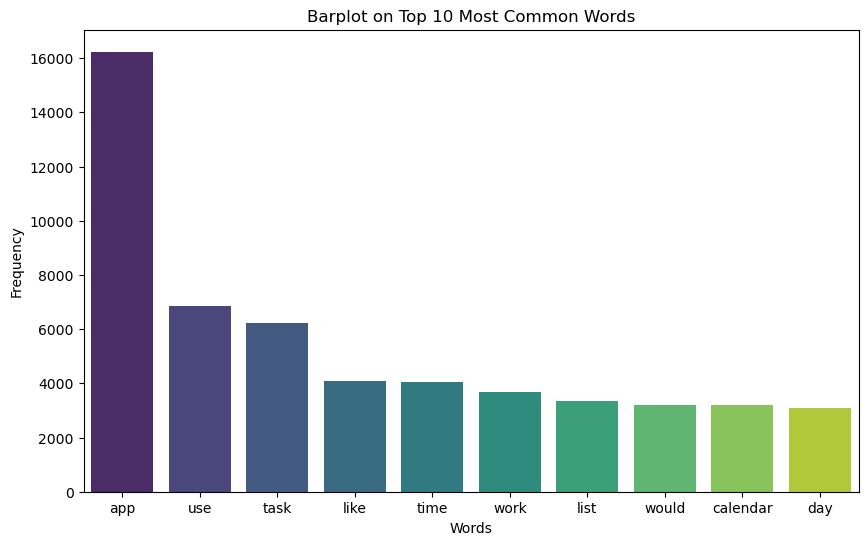

In [24]:
# Plot for top 10 most commmon words 
#Splitting the text into words and counting occurrence of each word and selecting top 10 common words
top_words = df['content'].str.split(expand = True).stack().value_counts()[:10]

# Creating a bar plot
plt.figure(figsize=(10, 6)) # creates new figure 
# In x : words , In y: frequency of those words
sns.barplot(x = top_words.index, y = top_words.values, palette='viridis')
plt.title('Barplot on Top 10 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

##  WordCloud

In [26]:
df['content'].isnull().sum()

0

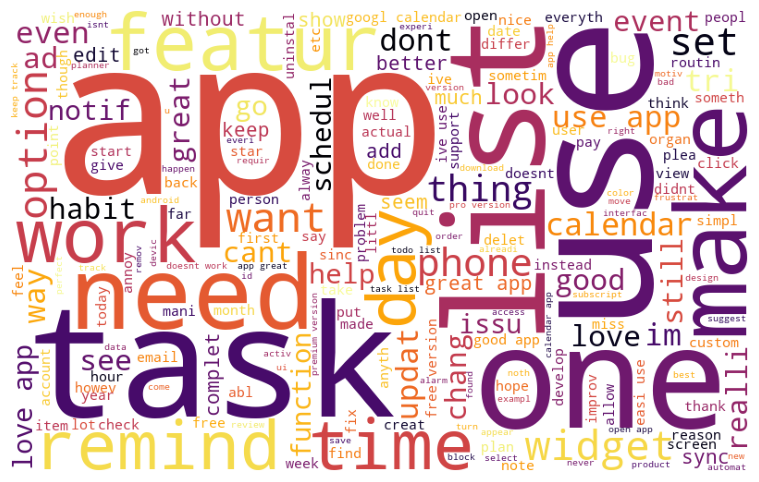

In [36]:
string = ' '.join(df['content'])  # Concatenate all text data into a single string
# Generate word cloud
wordcloud = WordCloud(width = 800, height = 500, background_color = 'white',colormap = 'inferno').generate(string)

# Plot Word Cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()